<a href="https://www.kaggle.com/code/muhammadasifwazir/netflix-business-case-study-eda-using-python-02?scriptVersionId=197878426" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Netflix Business Case study - EDA using Python**

**Objectives of the Assignment**

- Perform EDA on the given dataset and find insights.

- Provide Useful Insights and Business recommendations that can help the business to grow.


# 1. **IMPORTING LIBRIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. **LOADING DATA**

In [2]:
df=pd.read_csv(r'/kaggle/input/netflix-dataset/Netflix_dataset.csv')

# 3. **BASIC OBSERVATIONS**
- Shape of the dataset
- Checking few rows
- Count of the non-null values
- Unique values of each column
- Detailed description of numerical and categorical columns

In [3]:
df.shape

(8807, 12)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Why Only release_year is Numerical:**

The release_year column is intended to represent a specific quantity (the year), while the other columns contain information that is descriptive or categorical in nature, such as the title of a show, its type, cast, director, and more. These types of data are better represented as objects (strings) rather than numerical values.

In [7]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

# 4. **DATA CLEANING**

**0A. Removing Extra information column description**

In [9]:
df = df.drop('description', axis=1)

**A. Overall null values in each column**

In [10]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In the dataset, there are 3 missing values found in the duration column that were present in the rating column. We transferred these values from the rating column to the duration column and filled the corresponding entries in the rating column with 'Not Rated'.

In [11]:
#df[df['rating'].isna()]
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


1. we also found that there are 3 wrong entries at duration column at show_id s5542,s5795 , s5814

**B. Impute null values using fillna() method**
- Fill the null values in rating column

In [12]:
df['rating'] = df['rating'].fillna('Not Rated')

**C. Replace the wrong entries in rating and duration column**

**Identified Issues:** We discovered that some entries in the rating column were incorrectly labeled as durations and needed to be transferred to the duration column.

**Transferred Values:** We created a method to transfer specific duration entries from the rating column to the duration column.

**Updated Specific Rows:** We modified the rating and duration columns for specific rows identified by show_ids that contained incorrect entries.

**Replaced Values:** We replaced all occurrences of 'NR', 'UR' and 'Not Rated' in the rating column with 'Not Rated'.

In [13]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Not Rated', 'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
#return all rows where the rating column matches any of the specified values
df[df['rating'].isin(['74 min', '84 min', '66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


In [15]:
df[df['show_id'].isin(['s5542','s5795','s5814'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


In [16]:
# Update the rating and duration for specific show_ids
df.loc[df['show_id'] == 's5542', ['rating', 'duration']] = ['None', '90 min']
df.loc[df['show_id'] == 's5795', ['rating', 'duration']] = ['None', '120 min']
df.loc[df['show_id'] == 's5814', ['rating', 'duration']] = ['None', '60 min']

- Rating column: NR (Not rated), UR (Unrated), and Not Rated are same. So convert all these into 'Not Rating' Only

In [17]:
# replace all occurrences of 'NR' and 'UR' with 'Not Rated' in the rating column
df['rating'] = df['rating'].replace(['NR', 'UR'], 'Not Rated')

In [18]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'None', 'Not Rated', 'TV-Y7-FV'],
      dtype=object)

In [19]:
df.rating.value_counts()

rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
Not Rated      87
G              41
TV-Y7-FV        6
NC-17           3
None            3
Name: count, dtype: int64

**D. Change the datatype of date_added column from object to datetime using pandas function to_datetime()**

dropped the null from date_added column

In [20]:
#df[df['date_added'].isna()]

In [21]:
df.dropna(subset=['date_added'], inplace=True)

In [22]:
df['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

For 'date_added' column, all values confirm to date format, So we can convert its data type from object to datetime

In [23]:
#problematic_entries = df[~df['date_added'].str.match(r'^\s*[A-Za-z]+\s+\d{1,2},\s+\d{4}\s*$', na=False)]
#problematic_entries

In [24]:
df[df['date_added'].isin([' August 4, 2017'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand..."
6457,s6458,TV Show,Chef & My Fridge,NaN,"Seong-joo Kim​, Jung-hwan Ahn",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Reali..."
7705,s7706,TV Show,Paranormal Survivor,NaN,NaN,Canada,"August 4, 2017",2016,TV-14,2 Seasons,Docuseries


In [25]:
# Remove spaces from the 'date_added' column
df['date_added'] = df['date_added'].str.strip()

In [26]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [27]:
print(df['date_added'].dtype)

datetime64[ns]


**Total null values in each column of the Dataset**

In [28]:
df.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

**E. Check the types of content present in dataset (Hint unique values of type col)**

In [29]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

# **Challenging Questions:**

- **The oldest and the most recent movie/TV show released on Netflix in which year?**

In [30]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [31]:
df.release_year.min() , df.release_year.max()

(1925, 2021)

- **Find the oldest movie/TV show (released in 1925):**

The oldest TV show is "Pioneers: First Women Filmmakers"

In [32]:
oldest_content = df[df['release_year'] == df['release_year'].min()]
oldest_content

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows


- **Find the most recent movie/TV show (released in 2021):**

The most recent TV-show is "Blood & Water"

In [33]:
most_recent_content = df[df['release_year'] == df['release_year'].max()].sort_values('date_added', ascending=False)
most_recent_content.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


- **Which are the different ratings available on Netflix in each type of content (Movies/TV Show)? Check the number of contents released in each type.**

In [34]:
print(df.groupby('type')['rating'].value_counts())

type     rating   
Movie    TV-MA        2062
         TV-14        1427
         R             797
         TV-PG         540
         PG-13         490
         PG            287
         TV-Y7         139
         TV-Y          131
         TV-G          126
         Not Rated      80
         G              41
         TV-Y7-FV        5
         NC-17           3
         None            3
TV Show  TV-MA        1143
         TV-14         730
         TV-PG         321
         TV-Y7         194
         TV-Y          175
         TV-G           94
         Not Rated       6
         R               2
         TV-Y7-FV        1
Name: count, dtype: int64


In [35]:
df['type'].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

- **The Total number of cotent in each type (movies and TV shows) in dataset.**

The dataset contains **6131 movies** and **2666 TV shows**, showing the distribution of content types available.

In [36]:
df['country'].value_counts()

country
United States                             2812
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [37]:
# Split the country column by commas and expand into separate rows
split_countries = df['country'].str.split(',', expand=True)

# Stack the result to convert it into a single column and remove leading/trailing spaces
stacked_countries = split_countries.stack().str.strip()

# Count the unique countries
unique_countries = stacked_countries.nunique()
unique_countries


123

Total movies from 123 countries

- **Total movies and tv shows directed by each director.**

The dataset contains **4528 directors**. 

The top 5 directors are:

- **Rajiv Chilaka**: 19 titles
- **Raúl Campos, Jan Suter**: 18 titles
- **Marcus Raboy**: 16 titles
- **Suhas Kadav**: 16 titles
- **Jay Karas**: 14 titles

In [38]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

# Visual Analysis

1. **Distribution of content across the different types (Movies/TV Shows) using matplotlib pie chart**

2. **General visual analysis of null values in each column**

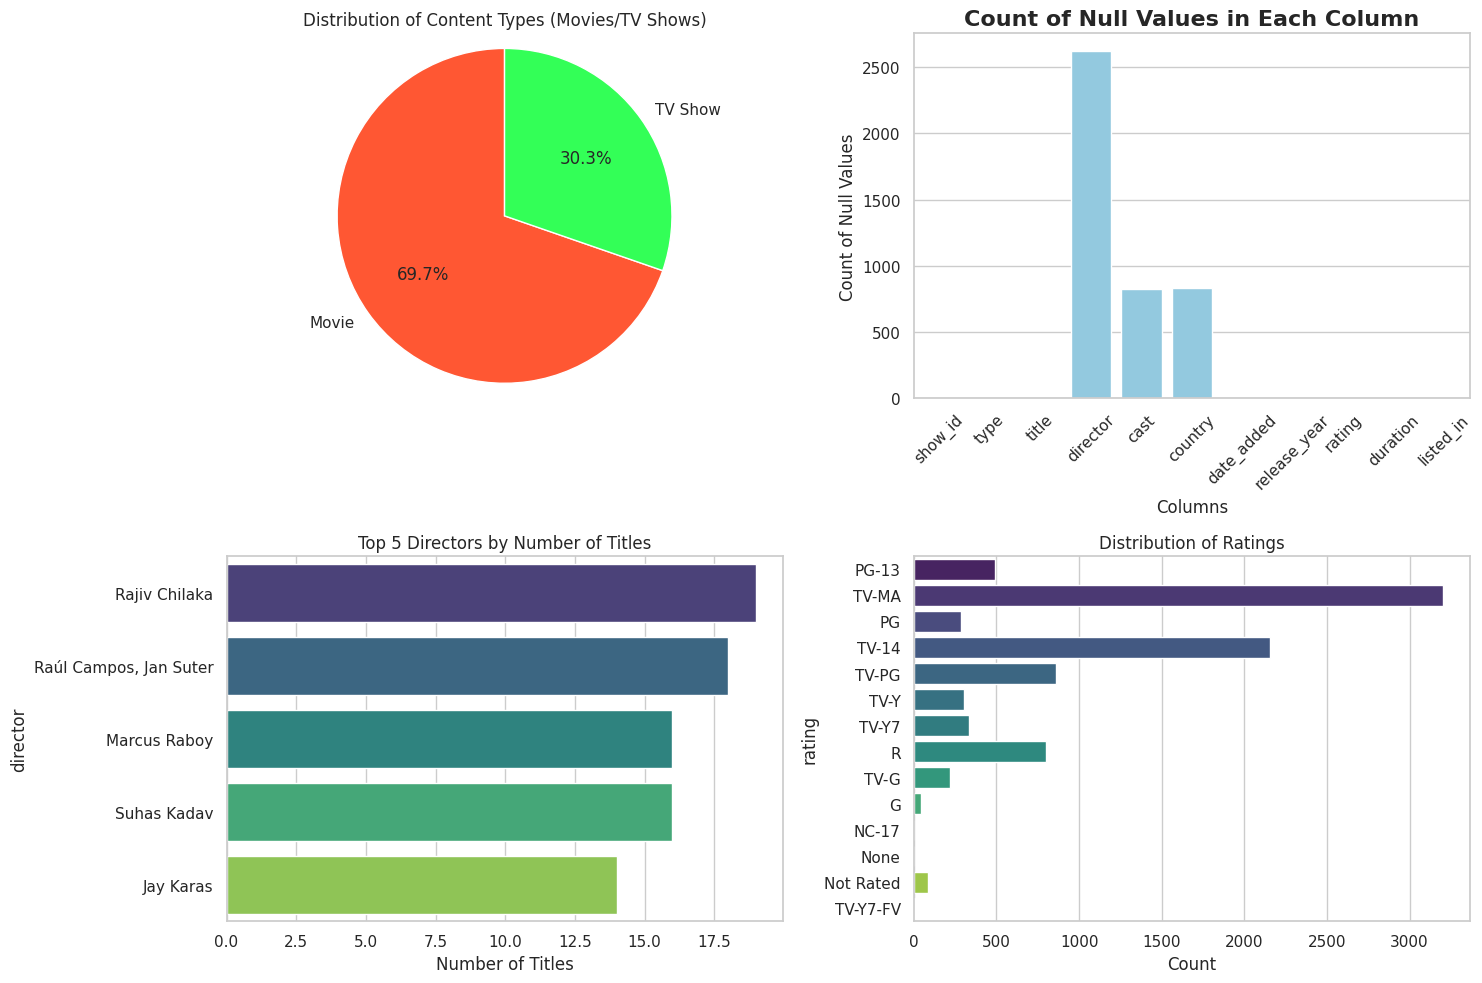

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 1. Pie Chart: Distribution of Content Types
type_counts = df['type'].value_counts()
axs[0, 0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF5733', '#33FF57'])
axs[0, 0].set_title('Distribution of Content Types (Movies/TV Shows)')
axs[0, 0].axis('equal')

# 2. Bar Chart: Count of Null Values
null_counts = df.isnull().sum()
sns.barplot(x=null_counts.index, y=null_counts.values, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Count of Null Values in Each Column', fontsize=16, fontweight='bold')
axs[0, 1].set_xlabel('Columns', fontsize=12)
axs[0, 1].set_ylabel('Count of Null Values', fontsize=12)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar Chart: Top 5 Directors
top_directors = df['director'].value_counts().head(5)
sns.barplot(x=top_directors.values, y=top_directors.index, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Top 5 Directors by Number of Titles')
axs[1, 0].set_xlabel('Number of Titles')

# 4. Count Plot: Ratings Distribution
sns.countplot(y='rating', data=df, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Distribution of Ratings')
axs[1, 1].set_xlabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


3. **Seaborn box plot for each numeric column to identify any outliers.**

Numeric columns: Index(['release_year'], dtype='object')


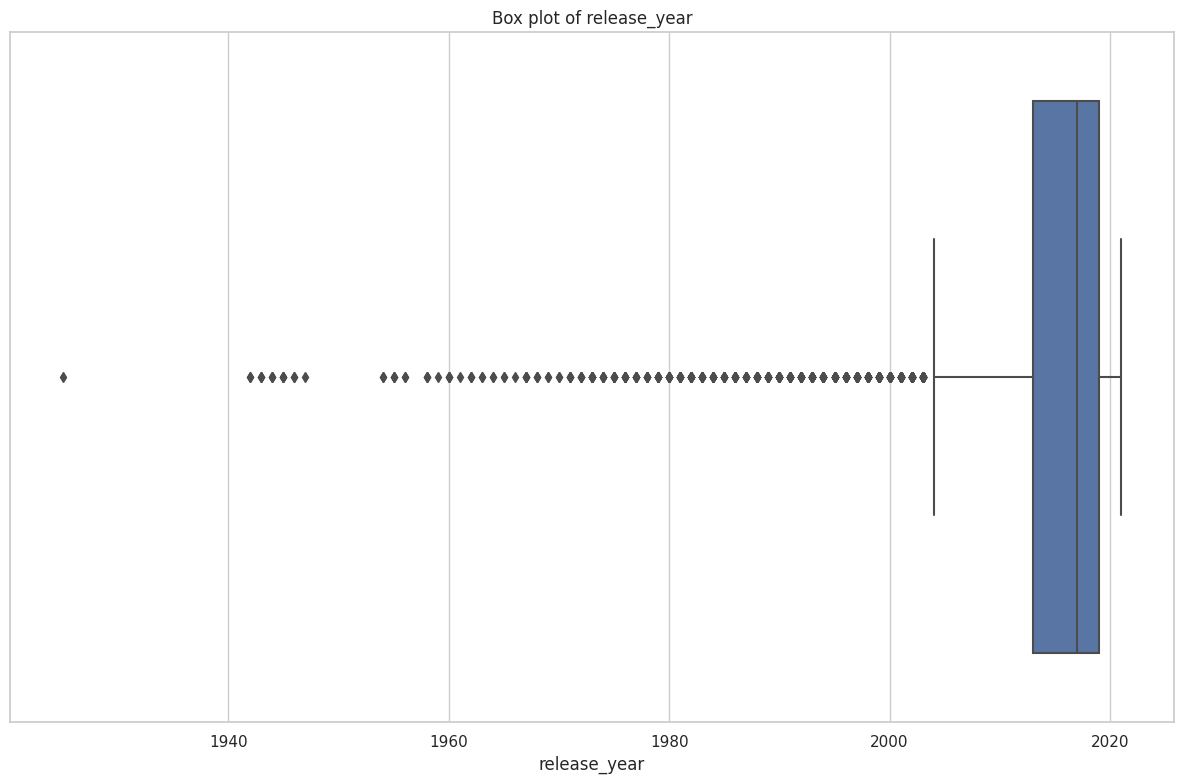

In [40]:

# Checking for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print(f"Numeric columns: {numeric_cols}")

# Plotting box plots for each numeric column
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


# Insights and Business Recommendations

Based on the exploratory data analysis performed on the Netflix dataset, here are some key insights and actionable business recommendations:

### **Useful Insights:**

1. **Content Type Distribution (Movies vs. TV Shows):**
   - **Insight**: The dataset consists of **6131 movies** and **2666 TV shows**. This indicates a heavier focus on movies, with movies making up around 70% of the available content.
   - **Business Impact**: Movies dominate Netflix’s catalog, but the growing trend of binge-watching TV shows could shift focus in the future.

2. **Release Year Analysis**:
   - **Insight**: The oldest content dates back to 1925 (*"Pioneers: First Women Filmmakers"*) and the most recent content is from 2021 (*"Blood & Water"*). The dataset shows a steady increase in content releases over the years, with a median release year of 2017.
   - **Business Impact**: Users are more attracted to fresh content, as most of Netflix's content is from recent years, providing high engagement.

3. **Country-Wise Content Contribution**:
   - **Insight**: Netflix’s catalog features content from **123 countries**. Some countries have significantly higher contributions, while others are underrepresented.
   - **Business Impact**: This shows Netflix’s global reach, but also highlights regions with fewer content contributions, which Netflix could target for content expansion.

4. **Ratings Analysis**:
   - **Insight**: The `rating` column shows a variety of content ratings, ranging from child-friendly to adult-only (e.g., PG, TV-MA, Not Rated). Ratings across movies and TV shows are fairly diverse.
   - **Business Impact**: A clear understanding of the content rating distribution will help Netflix optimize its recommendations, especially for family-friendly or child-centric content.

5. **Director-Wise Content**:
   - **Insight**: There are **4528 unique directors** in the dataset. The top 5 most prolific directors have contributed to multiple titles, with Rajiv Chilaka at the top (19 titles).
   - **Business Impact**: Content from prolific directors can be leveraged for marketing campaigns and further collaborations to drive engagement.

6. **Null Value Gaps**:
   - **Insight**: Significant gaps were observed in the `director`, `cast`, and `country` columns, with around 30% missing values in `director`, and about 9% in `cast` and `country`.
   - **Business Impact**: Missing data could affect Netflix’s content recommendation system, especially for users who search for content by their favorite directors or cast members.

7. **Duration and Content Type Correlation**:
   - **Insight**: There are variations in the duration of content, with movies tending to have more variable lengths compared to TV shows, which follow more standardized episode lengths.
   - **Business Impact**: This insight can help Netflix offer recommendations based on user preference for shorter or longer content, or even specific genres that fit different time slots.

---

### **Business Recommendations:**

1. **Balanced Investment in Movies and TV Shows**:
   - Although movies dominate the catalog, TV shows have seen a rise in popularity due to binge-watching culture. Netflix should continue to balance investment between movies and long-running series. Expanding TV show offerings could attract and retain viewers who prefer episodic content.
   - **Actionable Step**: Increase the number of TV show titles in growing genres like thrillers, sci-fi, or documentaries to capitalize on current viewer trends.

2. **Target Regional Content Production**:
   - Netflix should expand its presence in underrepresented markets by producing region-specific content. By analyzing countries with lower content contributions, Netflix can create content tailored for those regions, which will help drive subscriptions in new and emerging markets.
   - **Actionable Step**: Collaborate with local production studios and filmmakers to produce culturally relevant content that resonates with regional audiences, particularly in Asia and Africa.

3. **Leverage Data for Personalized Recommendations**:
   - Given the diversity in ratings, Netflix can further enhance its recommendation engine by personalizing content based on viewer history, preferred genres, and user age groups. This will improve user satisfaction and engagement.
   - **Actionable Step**: Implement machine learning algorithms that dynamically adjust recommendations based on user preferences for content length, rating (family-friendly, adult-only), and language.

4. **Collaborate with Popular Directors**:
   - Prolific directors like Rajiv Chilaka and Raúl Campos have consistently contributed content to Netflix. Partnering with these directors for exclusive releases or original content can generate hype and attract dedicated fan bases.
   - **Actionable Step**: Create exclusive partnerships or multi-title deals with the top directors, showcasing their works prominently on the platform.

5. **Improve Metadata Completeness**:
   - Filling in missing data for `director`, `cast`, and `country` fields will enhance search functionality and recommendation systems. This will also aid in content discovery, making it easier for users to find shows and movies based on their preferences.
   - **Actionable Step**: Invest in improving metadata accuracy by cross-referencing information from trusted databases and crowdsourcing corrections where applicable. This will also enhance Netflix's recommendation engine.

6. **Optimize Content Release Timing**:
   - The analysis of `date_added` and `release_year` suggests that regular releases of new content maintain user engagement. Netflix should continue to release content in a staggered manner, with strategic drops of high-interest shows and movies to keep users hooked.
   - **Actionable Step**: Adopt a data-driven content release schedule, focusing on releasing content during peak periods (e.g., weekends, holidays) and monitoring engagement metrics closely to adjust future releases.

7. **Cater to Different Content Length Preferences**:
   - Users may prefer shorter or longer content depending on their viewing habits. Netflix could create personalized recommendations based on content duration, offering bite-sized content to users with less time and long-form series for binge-watchers.
   - **Actionable Step**: Introduce "Quick Watch" categories for shorter films or mini-series and market them as ideal for viewers with limited time.

---

### Final Recommendations for Growth:

- **Invest in Content Localization**: By expanding its regional content library and focusing on underrepresented markets, Netflix can capture more subscribers globally, particularly in regions with growing demand for local content.
  
- **Enhance User Personalization**: Through more accurate metadata and refined recommendation algorithms, Netflix can improve the user experience, ensuring that viewers are discovering content that aligns with their tastes and preferences.

- **Leverage Data-Driven Content Strategies**: Netflix should use data analytics to decide content production, acquisition, and marketing strategies based on insights from user engagement and content trends.

**By leveraging these insights and recommendations, Netflix can continue to grow its platform, enhance user satisfaction, and maintain its position as a leading media and video streaming service.**